In [1]:
import pandas as pd

In [5]:
house = pd.read_excel("http://byungwan.com/class/House_Prices.xls")
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [6]:
# high price or low class -> classification

In [8]:
house["House_Class"] = pd.qcut(house["Price"], 2, labels = [0, 1])

In [9]:
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,House_Class
0,1,114300,1790,2,2,2,No,East,0
1,2,114200,2030,4,2,3,No,East,0
2,3,114800,1740,3,2,1,No,East,0
3,4,94700,1980,3,2,3,No,East,0
4,5,119800,2130,3,3,3,No,East,0


In [27]:
house = pd.get_dummies(house, columns= ["Brick", "Neighborhood"], drop_first = True, dtype = int)

In [28]:
y = house.iloc[: , 6]

In [29]:
house.shape

(128, 10)

In [31]:
x = house.iloc[: , [2,3,4,5,7,8,9]]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier(criterion = 'gini') # can use entropy or gini

In [45]:
# originally entropy was 1 -> 0
# perfectly divided would be 0
# chose the one has the highest information gain first -> second highest information gain

In [46]:
## Gini Index
# Another commoonly used measure of impurity

In [47]:
dt_model = dtc.fit(x_train, y_train)

In [48]:
y_pred = dt_model.predict(x_test)

In [49]:
from sklearn import metrics

In [50]:
metrics.confusion_matrix(y_test, y_pred)

array([[15,  2],
       [ 4, 18]])

In [51]:
metrics.accuracy_score(y_test, y_pred)

0.8461538461538461

## 2. Visualization of tree

In [52]:
from sklearn.tree import plot_tree

In [54]:
from matplotlib import pyplot as plt

In [60]:
vars = x.columns.tolist()

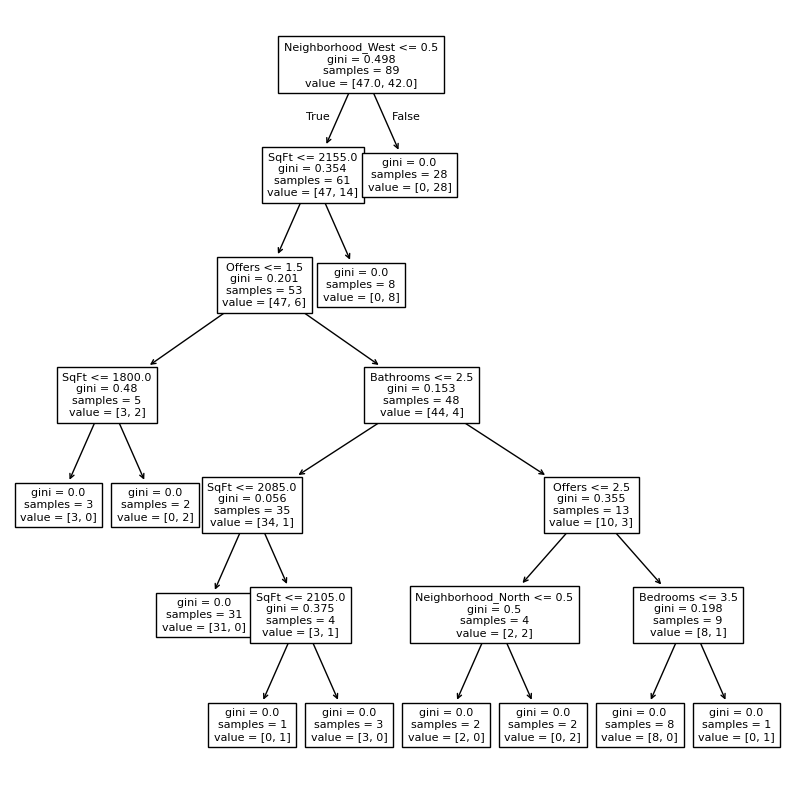

In [63]:
plt.figure(figsize = (10,10))
plot_tree(dt_model, feature_names = vars, fontsize=8)
plt.show()

In [65]:
y_train.value_counts().index

CategoricalIndex([0, 1], categories=[0, 1], ordered=True, dtype='category', name='House_Class')

In [66]:
cn = ["Low", "High"]
cn

['Low', 'High']

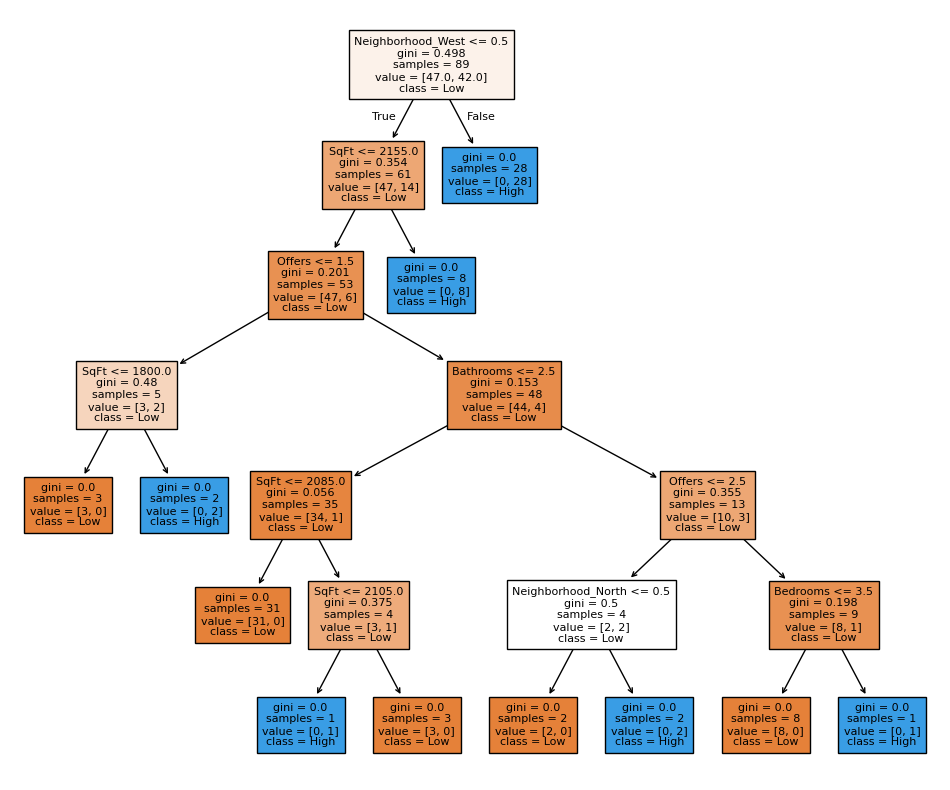

In [69]:
plt.figure(figsize = (12,10))
plot_tree(dt_model, feature_names = vars, fontsize=8, class_names = cn, filled=True)
plt.show()

## 3. Pruning

In [71]:
dtc2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [72]:
dt_model2 = dtc2.fit(x_train, y_train)

In [74]:
y_pred2 = dt_model2.predict(x_test)

In [75]:
metrics.accuracy_score(y_test, y_pred2)

0.7692307692307693

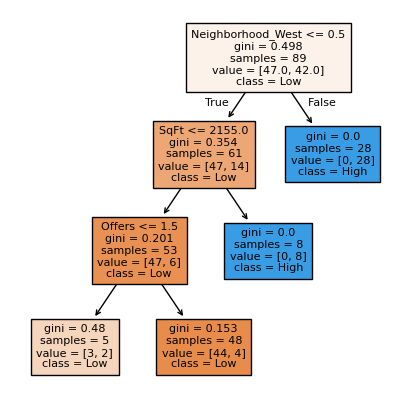

In [77]:
plt.figure(figsize = (5,5))
plot_tree(dt_model2, feature_names = vars, fontsize=8, class_names = cn, filled=True)
plt.show()

In [78]:
nums = range(1,11)

In [79]:
list(nums)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [80]:
for n in nums:
    dt_n = DecisionTreeClassifier(criterion = 'gini', max_depth=n)
    dt_model_n = dt_n.fit(x_train, y_train)
    y_pred_n = dt_model_n.predict(x_test)
    scores = metrics.accuracy_score(y_test,y_pred_n)
    print(str(n) + ": " + str(scores))

1: 0.717948717948718
2: 0.7692307692307693
3: 0.7692307692307693
4: 0.8205128205128205
5: 0.8205128205128205
6: 0.8461538461538461
7: 0.8461538461538461
8: 0.8461538461538461
9: 0.8461538461538461
10: 0.8461538461538461
